### DBSCAN (Density-based spatial clustering of applications with noise), 밀도기반 공간 군집화
- K-Means와 Hierarchical Clustering은 군집간의 거리를 이용하지만, DBSCAN은 데이터가 몰려 있어서 밀도가 높은 부분을 이용하는 방식이다.
- 임의의 점 p가 있을 때,  
이 점(p)부터 다른 점까지의 거리 e(epsilon)내에 다른 점이 m(minPts)개 있으면 하나의 군집으로 인식하고, 이 때 p를 중심점(core point)이라고 한다.
- DBSCAN 사용 시, 기준점 부터의 거리 epsilon값과, 이 반경내에 있는 점의 수 minPts를 전달해야 한다.
- 클러스터의 밀도에 따라서 클러스터를 서로 연결하기 때문에 기하학적인 모양을 갖는 군집도 잘 찾는다.
<img src="./images/DBSCAN.gif" width="500" style="margin-left: -30px">

##### 학생의 수준 분석 데이터
- STG: 목표물 소재 연구시간 정도
- SCG: 목표물 재료의 사용자 반복수
- STR: 목표대상이 있는 관련 대상에 대한 사용자의 학습시간 정도
- LPR: 목표대상이 있는 관련 대상에 대한 사용자의 시험성적
- PEG: 목표물에 대한 사용자의 시험성적
- UNS: 사용자의 지식수준 (매우 낮음, 낮음, 중간, 높음)

In [2]:
import pandas as pd

# conda install -c anaconda xlrd
student_df = pd.read_excel('./datasets/student.xls')
student_df

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
...,...,...,...,...,...,...
398,0.90,0.78,0.62,0.32,0.89,High
399,0.85,0.82,0.66,0.83,0.83,High
400,0.56,0.60,0.77,0.13,0.32,Low
401,0.66,0.68,0.81,0.57,0.57,Middle


In [3]:
student_df.isna().sum()

STG     0
SCG     0
STR     0
LPR     0
PEG     0
 UNS    0
dtype: int64

In [4]:
student_df.duplicated().sum()

0

In [5]:
student_df.describe().T

,count,mean,std,min,25%,50%,75%,max
STG,403.0,0.353141,0.212018,0.0,0.200,0.30,0.48,0.99
SCG,403.0,0.355940,0.215531,0.0,0.200,0.30,0.51,0.90
STR,403.0,0.457655,0.246684,0.0,0.265,0.44,0.68,0.95
LPR,403.0,0.431342,0.257545,0.0,0.250,0.33,0.65,0.99
PEG,403.0,0.456360,0.266775,0.0,0.250,0.40,0.66,0.99


In [6]:
student_df = student_df.rename(columns={' UNS': 'UNS'})
student_df

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
...,...,...,...,...,...,...
398,0.90,0.78,0.62,0.32,0.89,High
399,0.85,0.82,0.66,0.83,0.83,High
400,0.56,0.60,0.77,0.13,0.32,Low
401,0.66,0.68,0.81,0.57,0.57,Middle


In [7]:
student_df.UNS.value_counts()

UNS
Low         129
Middle      122
High        102
Very Low     26
very_low     24
Name: count, dtype: int64

In [8]:
student_df.UNS = student_df.UNS.apply(lambda x: 'Very Low' if x == 'very_low' else x)
student_df.UNS.value_counts()

UNS
Low         129
Middle      122
High        102
Very Low     50
Name: count, dtype: int64

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=124)
pca_df = pca.fit_transform(student_df.iloc[:, :-1])

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.29178757 0.23990727]
0.5316948415176521


In [10]:
pca_columns=[f'pca{i+1}' for i in range(2)]
pca_df = pd.DataFrame(pca_df, columns=pca_columns)
pca_df

,pca1,pca2
0,0.851933,-0.320158
1,0.020553,-0.446032
2,0.487168,-0.215345
3,0.354270,0.175159
4,0.368738,0.480435
...,...,...
398,-0.656978,-0.187663
399,-0.743754,0.300973
400,-0.098946,-0.131658
401,-0.457211,0.177232


<Axes: xlabel='pca1', ylabel='pca2'>

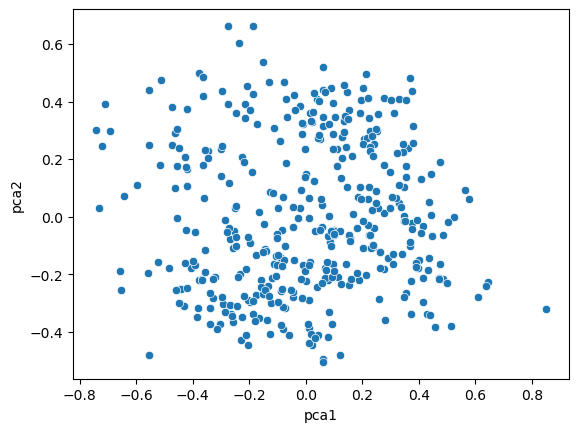

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='pca1', y='pca2', data=pca_df)

In [22]:
import numpy as np

### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['pca1'], y=label_cluster['pca2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

In [13]:
# !pip install mglearn

  Obtaining dependency information for mglearn from https://files.pythonhosted.org/packages/bb/8b/687d30a3df6b870af541dde6327423e35713e38243db135f57b4ebd054f3/mglearn-0.2.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for imageio from https://files.pythonhosted.org/packages/9b/82/473e452d3f21a9cd7e792a827f8df58bdff614fd2fff33d7bf6c4c128da7/imageio-2.31.6-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/581.4 kB ? eta -:--:--
   ---- ----------------------------------- 61.4/581.4 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 581.4/581.4 kB 7.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/313.2 kB ? eta -:--:--
   --------------------------------------- 313.2/313.2 kB 18.9 MB/s eta 0:00:00


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


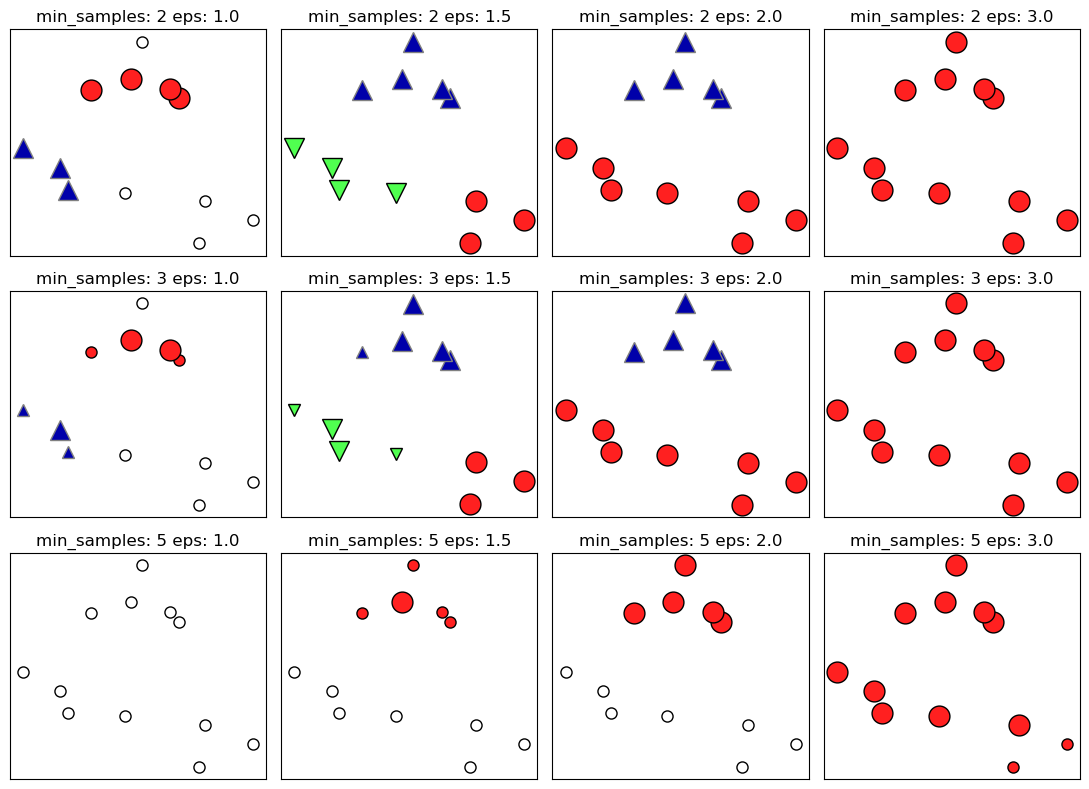

In [14]:
import mglearn

mglearn.plots.plot_dbscan()

In [19]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.07, min_samples=15, metric='euclidean')
dbscan_labels = dbscan.fit_predict(pca_df)

pca_df['cluster'] = dbscan_labels
pca_df

,pca1,pca2,cluster
0,0.851933,-0.320158,-1
1,0.020553,-0.446032,-1
2,0.487168,-0.215345,-1
3,0.354270,0.175159,-1
4,0.368738,0.480435,-1
...,...,...,...
398,-0.656978,-0.187663,-1
399,-0.743754,0.300973,-1
400,-0.098946,-0.131658,1
401,-0.457211,0.177232,-1


In [20]:
pca_df.cluster.value_counts()

cluster
-1    311
 1     44
 2     18
 0     15
 3     15
Name: count, dtype: int64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10256\2473390518.py:20: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=label_cluster['pca1'], y=label_cluster['pca2'], s=70,\


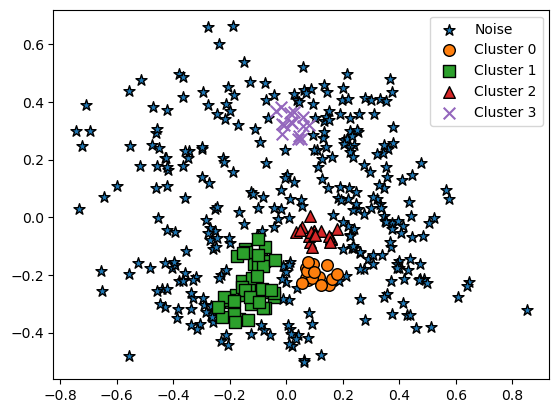

In [23]:
visualize_cluster_plot(dbscan, pca_df, 'cluster', iscenter=False)

In [24]:
student_df['cluster'] = pca_df.cluster
student_df

,STG,SCG,STR,LPR,PEG,UNS,cluster
0,0.00,0.00,0.00,0.00,0.00,Very Low,-1
1,0.08,0.08,0.10,0.24,0.90,High,-1
2,0.06,0.06,0.05,0.25,0.33,Low,-1
3,0.10,0.10,0.15,0.65,0.30,Middle,-1
4,0.08,0.08,0.08,0.98,0.24,Low,-1
...,...,...,...,...,...,...,...
398,0.90,0.78,0.62,0.32,0.89,High,-1
399,0.85,0.82,0.66,0.83,0.83,High,-1
400,0.56,0.60,0.77,0.13,0.32,Low,1
401,0.66,0.68,0.81,0.57,0.57,Middle,-1


In [25]:
student_df.cluster.value_counts()

cluster
-1    311
 1     44
 2     18
 0     15
 3     15
Name: count, dtype: int64

<Axes: xlabel='PEG', ylabel='Count'>

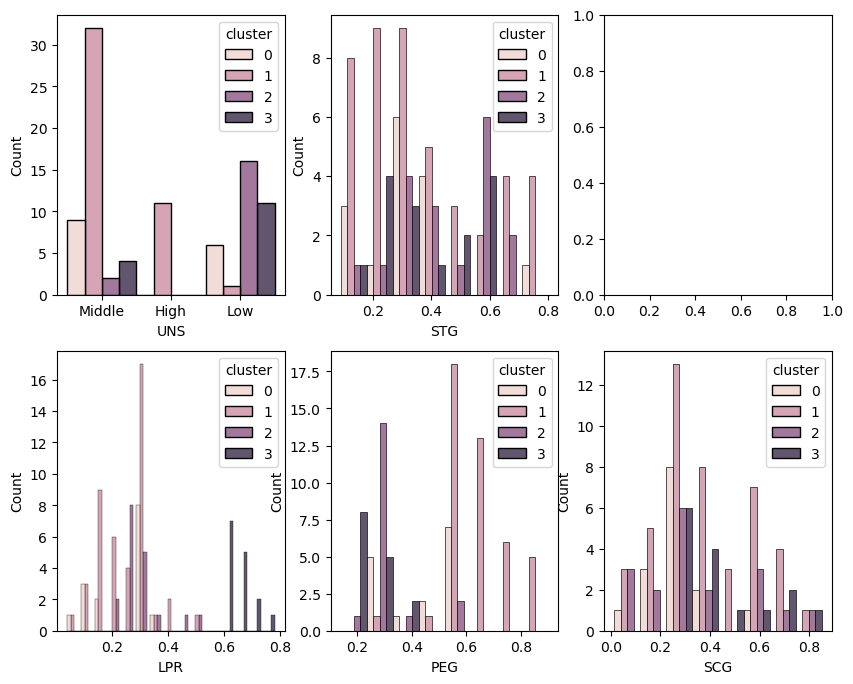

In [26]:
fig, ax = plt.subplots(2, 3, figsize=(10, 8))
sns.histplot(x='UNS', hue='cluster', multiple='dodge', data=student_df[student_df.cluster != -1], ax=ax[0][0])
sns.histplot(x='STG', hue='cluster', multiple='dodge', data=student_df[student_df.cluster != -1], ax=ax[0][1])
sns.histplot(x='SCG', hue='cluster', multiple='dodge', data=student_df[student_df.cluster != -1], ax=ax[1][2])
sns.histplot(x='LPR', hue='cluster', multiple='dodge', data=student_df[student_df.cluster != -1], ax=ax[1][0])
sns.histplot(x='PEG', hue='cluster', multiple='dodge', data=student_df[student_df.cluster != -1], ax=ax[1][1])

- STG: 목표물 소재 연구시간 정도
- SCG: 목표물 재료의 사용자 반복수
- STR: 목표대상이 있는 관련 대상에 대한 사용자의 학습시간 정도
- LPR: 목표대상이 있는 관련 대상에 대한 사용자의 시험성적
- PEG: 목표물에 대한 사용자의 시험성적
- UNS: 사용자의 지식수준 (매우 낮음, 낮음, 중간, 높음)

##### 🚩결론: 시험 성적이 높아도 모든 부분의 점수를 높게 받지는 않는다.